### Шмидт Ян, 304 гр., 2023, Вариант 9

Из условия: $$\xi = \dfrac{1}{11}, \quad A = \dfrac{1}{15}, \quad B = \dfrac{1}{25}$$
Система ОДУ:
$$\dfrac{dy_1(x)}{dx}=Ay_2(x)\\ \dfrac{dy_2(x)}{dx}=-By_1(x)$$
Начальные данные: $$x_0 = 0\\ y_1(x_0)=B\pi\\ y_2(x_0)=A\pi$$

$$x_k = \pi\\ y_1(x_k) = ?\\ y_2(x_k) = ?$$

In [170]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

### Посчитаем необходимые коэффициенты

In [171]:
A = 1/15
B = 1/25
pi = np.pi
xi = 1/11

c2 = xi
a21 = c2
b1 = 1 - 1/(2*c2)
b2 = 1/(2*c2)
print(f'\nДля двухэтапного метода Рунге-Кутты: \nc2 = {c2}, \na21 = {a21}, \nb1 = {b1}, \nb2 = {b2}')


Для двухэтапного метода Рунге-Кутты: 
c2 = 0.09090909090909091, 
a21 = 0.09090909090909091, 
b1 = -4.5, 
b2 = 5.5


### Правая часть системы дифференциальных уравнений

In [172]:
def func(x: float, y: list):
    """Правая часть СОДУ"""
    
    A = 1/15
    B = 1/25
    
    y1 = A*y[1]
    y2 = -B*y[0]
    
    ans = [y1, y2]
    
    return np.array(ans)

### Начальные данные

In [173]:
x0 = 0
x1 = pi

y0 = [B*pi, A*pi]

### Точное решение поставленной задачи Коши

In [174]:
def y1(x):
    srt = np.sqrt(A*B)
    return ((A**(3/2))*pi*np.sin(srt*x)) / np.sqrt(B) + B*pi*np.cos(srt*x)

def y2(x):
    srt = np.sqrt(A*B)
    return (-1)*(np.sqrt(B/A))*(-(A**(3/2))*pi*np.cos(srt*x) / np.sqrt(B) + B*pi*np.sin(srt*x))

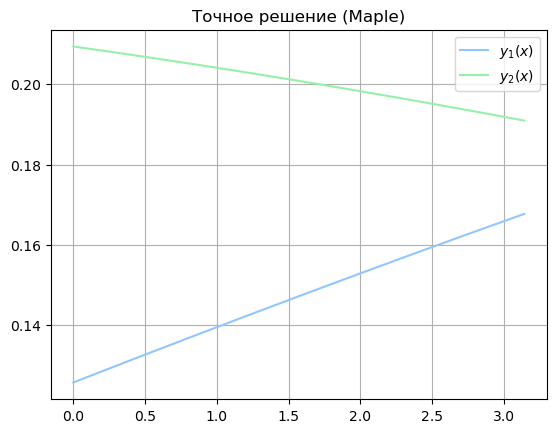

In [175]:
nodes = np.linspace(x0, x1, 150)
plt.plot(nodes, y1(nodes), label='$y_1(x)$')
plt.plot(nodes, y2(nodes), label='$y_2(x)$')

plt.grid()
plt.title('Точное решение (Maple)')
plt.legend()
plt.show()

In [176]:
y1_true = y1(pi)
y2_true = y2(pi)

f_true = [y1_true, y2_true]

print(f'Точное решение задачи Коши: {f_true}')

Точное решение задачи Коши: [0.16768641025029876, 0.19096724683765257]


### Через scipy

In [177]:
from scipy.integrate import odeint

In [178]:
def SODE(y, t, A, B):
    A = A
    B = B
    
    return np.array([A*y[1], -B*y[0]])

### Как построить интегральные кривые, проходящие через $x_{i}$?

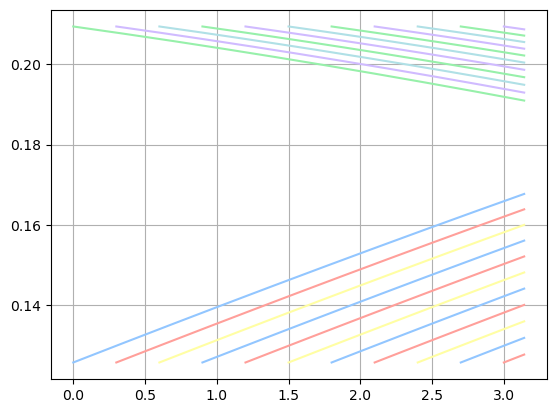

In [179]:
i = 0
while x0 + i < x1:
    nodes2 = np.linspace(x0 + i, x1, 10)
    sol = odeint(SODE, y0, nodes2, args=(A, B))    
    i += 0.3
    
    plt.plot(nodes2, sol)
    plt.grid()
plt.show()

### Явный метод Рунге-Кутты 2 порядка (ЯМРК 2)

In [180]:
def rungekutta2(f, y0, N, x0=0, x1=pi):
    """ЯМРК 2 порядка
    
    f: правая часть СОДУ
    y0: вектор начальных данных
    N: кол-во точек разбиения интервала (x0, x1)
    """
    
    t = np.linspace(x0, x1, N)
    h = (x1-x0) / N
    y = np.zeros((N+1, 2))
    y[0] = y0
    
    for i in range(N):
        k1 = h*f(t[i], y[i])
        k2 = h*f(t[i] + c2*h, y[i] + a21*k1)
        y[i+1] = y[i] + b1*k1 + b2*k2
        
    return y

### Оппонент: ЯМРК 4 порядка (Классический метод РК, правило $\frac{1}{6}$)

In [181]:
def opponent(f, y0, N, x0=0, x1=pi):
    """ЯМРК 4 порядка (правило одной шестой, или классический метод
    Рунге-Кутты)
    
    f: правая часть СОДУ
    y0: вектор начальных данных
    N: кол-во точек разбиения интервала (x0, x1)
    """
    
    t = np.linspace(x0, x1, N)
    h = (x1-x0) / N
    y = np.zeros((N+1, 2))
    y[0] = y0
    
    for i in range(N):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/2., y[i] + k1*h/2.)
        k3 = f(t[i] + h/2., y[i] + k2*h/2.)
        k4 = f(t[i] + h, y[i] + k3*h)
        y[i+1] = y[i] + (h/6.)*(k1 + 2*k2 + 2*k3 + k4)
        
    return y

### График зависимости нормы погрешности в конце отрезка от шага $h = \frac{1}{2^k}, k=\overline{0, 12}$

In [182]:
Norm_1 = []
Norm_2 = []
H = []

for k in range(14):
    h1 = 1/pow(2, k)
    H.append(h1)
    N1 = int((x1-x0)/h1)
    
    """Решение первым методом"""
    temp1 = rungekutta2(func, y0, N1)
    res1 = temp1[N1]
    Norm_1.append(np.linalg.norm(np.array(res1) - np.array(f_true)))

    """Решение вторым методом"""
    temp2 = opponent(func, y0, N1)
    res2 = temp2[N1]
    Norm_2.append(np.linalg.norm(np.array(res2) - np.array(f_true)))
    
H = H[2::]
Norm_1 = Norm_1[2::]
Norm_2 = Norm_2[2::]

print(f'Шаги H:\n {np.array(H)}')
print(f'\nНорма точной погрешности в конце отрезка для первого метода при различных h:\n {np.array(Norm_1)}')
print(f'\nНорма точной погрешности в конце отрезка для оппонента при различных h:\n {np.array(Norm_2)}')

Шаги H:
 [2.50000000e-01 1.25000000e-01 6.25000000e-02 3.12500000e-02
 1.56250000e-02 7.81250000e-03 3.90625000e-03 1.95312500e-03
 9.76562500e-04 4.88281250e-04 2.44140625e-04 1.22070312e-04]

Норма точной погрешности в конце отрезка для первого метода при различных h:
 [1.38005277e-06 3.17611571e-07 7.93619923e-08 1.98353728e-08
 4.90898612e-09 1.22716760e-09 3.06782015e-10 7.66948640e-11
 1.91740466e-11 4.79071193e-12 1.20008844e-12 3.00693081e-13]

Норма точной погрешности в конце отрезка для оппонента при различных h:
 [1.26146462e-11 6.68798240e-13 4.17260841e-14 2.66944578e-15
 1.38777878e-16 2.28878340e-16 2.22044605e-16 6.16273791e-16
 4.84730289e-16 5.21479921e-16 8.39118578e-16 1.47522908e-15]


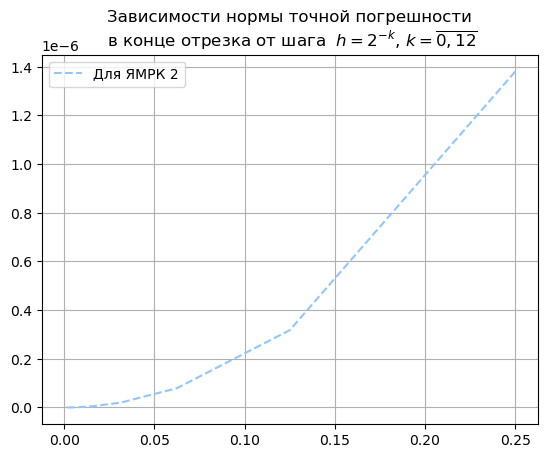

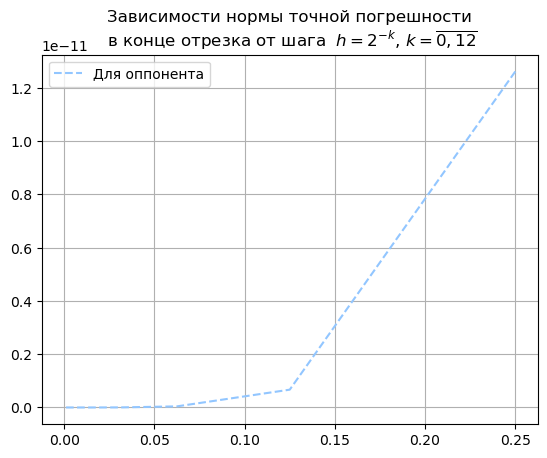

In [183]:
plt.plot(H, Norm_1, '--', label='Для ЯМРК 2')
plt.legend()
plt.title('Зависимости нормы точной погрешности\n в конце отрезка от шага  $h=2^{-k}$, $k=\overline{0,12}$')
plt.grid()
plt.show()

plt.plot(H, Norm_2, '--', label='Для оппонента')
plt.legend()
plt.title('Зависимости нормы точной погрешности\n в конце отрезка от шага  $h=2^{-k}$, $k=\overline{0,12}$')
plt.grid()
plt.show()

### Подборка оптимального постоянного шага для ЯМРК 2

In [184]:
s, tol = 2, 1e-9
N1 = 1
N2 = 2*N1

res1_1 = rungekutta2(func, y0, N1)
res1_1 = res1_1[N1]
res1_2 = rungekutta2(func, y0, N2)
res1_2 = res1_2[N2]
    
arr_res_1, arr_res_2 = [], []
arr_res_1.append(res1_1)
arr_res_2.append(res1_2)

N1 = 1
N2 = 2*N1

i, diff1, diffs1 = 1, 10, []
while diff1 >= tol:
    print(f'i: {i},\t diff1: {diff1}')
    
    res1_1 = rungekutta2(func, y0, N1)
    res1_1 = res1_1[N1]
    res1_2 = rungekutta2(func, y0, N2)
    res1_2 = res1_2[N2]
    
    """Норма разности двух приближений: по сетке с шагом
        h и h/2 соответственно"""
    diff1 = np.linalg.norm(np.array(res1_1) - np.array(res1_2))
    diffs1.append(diff1)
    
    arr_res_1.append(res1_1)
    arr_res_2.append(res1_2)
    
    N1 *= 2
    N2 = 2*N1
    i += 1

N_opt1 = int(0.5*N1)
res1 = rungekutta2(func, y0, N_opt1)
fmean1 = res1[N_opt1]

# Итоговый результат
print(f'Оптимальное число разбиений для постоянного шага: {N_opt1}')

i: 1,	 diff1: 10
i: 2,	 diff1: 0.0001528863539193231
i: 3,	 diff1: 3.772379687822551e-05
i: 4,	 diff1: 9.364460311482043e-06
i: 5,	 diff1: 2.3325622757922036e-06
i: 6,	 diff1: 5.820570070919264e-07
i: 7,	 diff1: 1.4537792079578033e-07
i: 8,	 diff1: 3.632738428724256e-08
i: 9,	 diff1: 9.079705250296879e-09
i: 10,	 diff1: 2.2696587720696596e-09
Оптимальное число разбиений для постоянного шага: 512


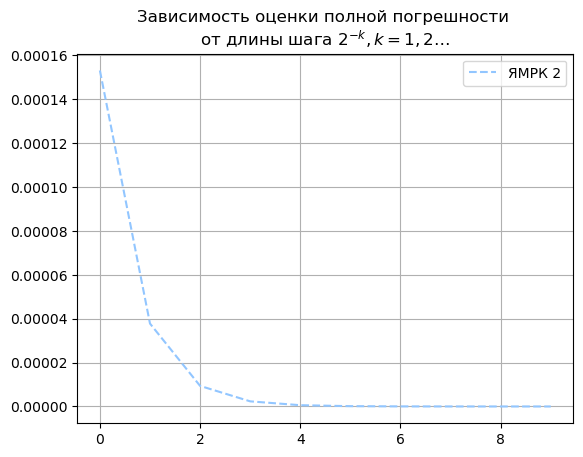

In [185]:
plt.title('Зависимость оценки полной погрешности \nот длины шага $2^{-k}, k=1,2\dots$')
plt.plot(diffs1, '--', label='ЯМРК 2')
plt.legend()
plt.grid()
plt.show()

In [186]:
print(f'Приближенное решение: {fmean1}')
print(f'Точное решение: {f_true}')
print(f'Норма погрешности: {np.linalg.norm(np.array(f_true) - np.array(fmean1))}')
print(f'Длина шага: {x1/N_opt1}')
print(f'Количество шагов: {N_opt1}')

Приближенное решение: [0.16768641 0.19096725]
Точное решение: [0.16768641025029876, 0.19096724683765257]
Норма погрешности: 7.565020817357637e-10
Длина шага: 0.006135923151542565
Количество шагов: 512


In [187]:
N1 = 1000
N2 = 2*N1
h = (x1-x0) / N1
s = 2

tol = 1e-5

res1_1 = rungekutta2(func, y0, N1)
res1_1 = res1_1[N1]

res1_2 = rungekutta2(func, y0, N2)
res1_2 = res1_2[N2]

"""Норма разности двух приближений: по сетке с шагом
h и h/2 соответственно"""
diff1 = np.linalg.norm(np.array(res1_1) - np.array(res1_2) )

h_opt1 = 0.5*h*((2**s - 1)*tol / diff1)**(1/s)
N_opt1 = int((x1-x0) / h_opt1)

# Итоговый результат
res1 = rungekutta2(func, y0, N_opt1)
fmean = res1[N_opt1]

In [188]:
# print(f'Приближенное решение: {fmean}')
# print(f'Точное решение: {f_true}')
# print(f'Норма погрешности: {np.linalg.norm(np.array(f_true) - np.array(fmean))}')
# print(f'Длина шага: {h_opt1}')
# print(f'Количество шагов: {N_opt1}')

### Подборка оптимального постоянного шага для оппонента

In [189]:
s, tol = 4, 1e-9
N1 = 1
N2 = 2*N1

res1_1 = rungekutta2(func, y0, N1)
res1_1 = res1_1[N1]
res1_2 = rungekutta2(func, y0, N2)
res1_2 = res1_2[N2]

arr_res_1, arr_res_2 = [], []
arr_res_1.append(res1_1)
arr_res_2.append(res1_2)

i, diff2, diffs2 = 1, 10, []
while diff2 >= tol:
    print(f'i: {i},\t норма разности 2х последних приближений: {diff2}')
    
    res1_1 = opponent(func, y0, N1)
    res1_1 = res1_1[N1]
    res1_2 = opponent(func, y0, N2)
    res1_2 = res1_2[N2]
    
    """Норма разности двух приближений: по сетке с шагом
        h и h/2 соответственно"""
    diff2 = np.linalg.norm(np.array(res1_1) - np.array(res1_2))
    diffs2.append(diff2)
    
    arr_res_1.append(res1_1)
    arr_res_2.append(res1_2)
    
    N1 *= 2
    N2 = 2*N1
    i += 1

N_opt2 = int(0.5*N1)
res2 = opponent(func, y0, N_opt2)
fmean2 = res2[N_opt2]
# Итоговый результат
print(f'Оптимальное число разбиений для постоянного шага: {N_opt2}')

i: 1,	 норма разности 2х последних приближений: 10
i: 2,	 норма разности 2х последних приближений: 2.5131085227284727e-07
i: 3,	 норма разности 2х последних приближений: 1.550879715634301e-08
Оптимальное число разбиений для постоянного шага: 4


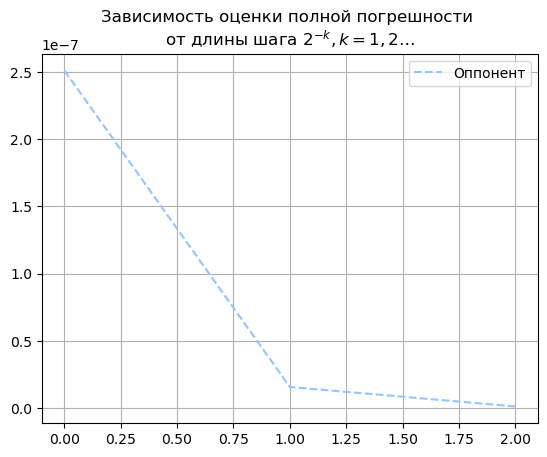

In [190]:
plt.title('Зависимость оценки полной погрешности \nот длины шага $2^{-k}, k=1,2\dots$')
plt.plot(diffs2, '--', label='Оппонент')
plt.legend()
plt.grid()
plt.show()

In [191]:
print(f'Приближенное решение: {fmean2}')
print(f'Точное решение: {f_true}')
print('Норма погрешности:', np.linalg.norm(np.array(f_true) - np.array(fmean2)))
print('Длина шага:', x1/N_opt2)
print('Количество шагов:', N_opt2)

Приближенное решение: [0.16768641 0.19096725]
Точное решение: [0.16768641025029876, 0.19096724683765257]
Норма погрешности: 1.026548423572349e-09
Длина шага: 0.7853981633974483
Количество шагов: 4


In [192]:
s = 4
tol = 1e-5

res2_1 = opponent(func, y0, N1)
res2_1 = res2_1[N1]

res2_2 = opponent(func, y0, N2)
res2_2 = res2_2[N2]

"""Норма разности двух приближений: по сетке с шагом
h и h/2 соответственно"""
diff2 = np.linalg.norm(np.array(res2_1) - np.array(res2_2))

h_opt2 = 0.5*h*((2**s - 1)*tol / diff2)**(1/s)
N_opt2 = int((x1-x0) / h_opt2)

# Итоговый результат
res2 = opponent(func, y0, N_opt2)
fmean = res2[N_opt2]

In [193]:
# print(f'Приближенное решение: {fmean}')
# print(f'Точное решение: {f_true}')
# print('Норма погрешности:', np.linalg.norm(np.array(f_true) - np.array(fmean)))
# print('Длина шага:', h_opt2)
# print('Количество шагов:', N_opt2)

### График зависимости полной погрешности от независимой переменной $x$

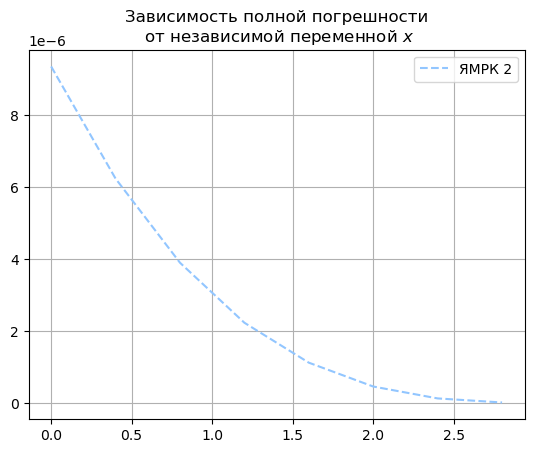

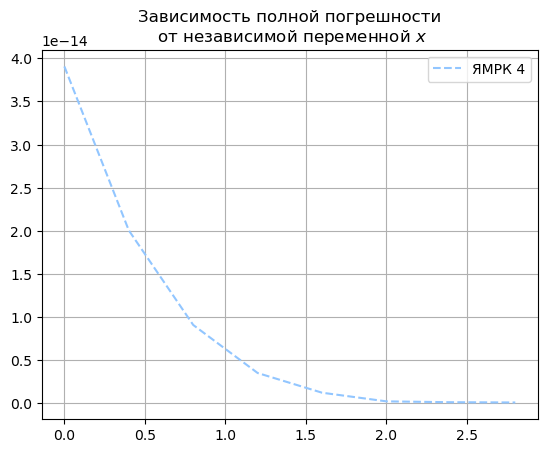

In [194]:
RR1 = []
RR2 = []

X = np.arange(x0, x1, 0.4)

for i in range(len(X)):
    h = (x1-x0) / H[i]

    # Результат на первой сетке для ЯМРК 2     
    res1_1 = rungekutta2(func, y0, N_opt1, x0=X[i])
    res1_1 = res1_1[-1]
    # Результат на второй сетке для ЯМРК 2
    res1_2 = rungekutta2(func, y0, 2*N_opt1, x0=X[i])
    res1_2 = res1_2[-1]
    
    # Норма разности найденных выше приблеженных решений
    R_temp = np.array(res1_1) - np.array(res1_2)
    RR1.append(np.linalg.norm(R_temp))

    # Результат на первой сетке для ЯМРК 4
    res2_1 = opponent(func, y0, N_opt2, x0=X[i])
    res2_1 = res2_1[-1]
    # Результат на второй сетке для ЯМРК 4
    res2_2 = opponent(func, y0, 2*N_opt2, x0=X[i])
    res2_2 = res2_2[-1]
    
    # Норма разности найденных выше приблеженных решений
    R_temp = np.array(res2_1) - np.array(res2_2)
    RR2.append(np.linalg.norm(R_temp))

plt.plot(X, RR1, '--', label='ЯМРК 2')
plt.title('Зависимость полной погрешности\n от независимой переменной $x$')
plt.legend()
plt.grid()
plt.show()

plt.plot(X, RR2, '--', label='ЯМРК 4') # метод-оппонент
plt.title('Зависимость полной погрешности\n от независимой переменной $x$')
plt.legend()
plt.grid()
plt.show()

### График зависимости полной погрешности от количества шагов

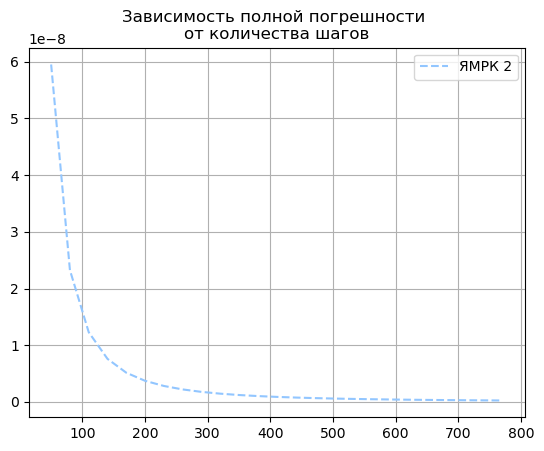

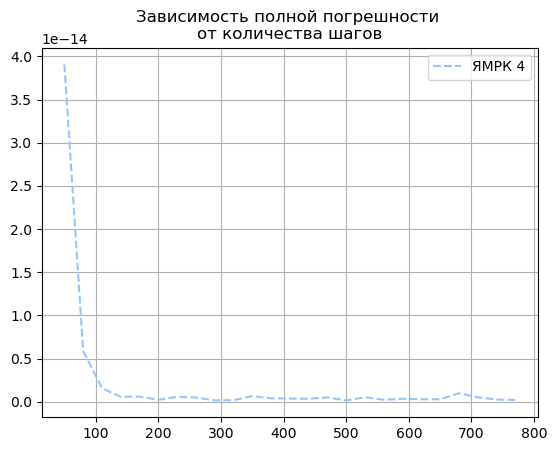

In [195]:
H = np.arange(50, 800, 30) # массив шагов
RR1 = []
RR2 = []

for i in range(len(H)):
    N1 = H[i]
    N2 = 2*N1
    h = (x1-x0) / H[i]
    
    res1_1 = rungekutta2(func, y0, N1)
    res1_1 = res1_1[-1]
    res1_2 = rungekutta2(func, y0, N2)
    res1_2 = res1_2[-1]
    
    R_temp = np.array(res1_1) - np.array(res1_2)
    RR1.append(np.linalg.norm(R_temp))

    res2_1 = opponent(func, y0, N1)
    res2_1 = res2_1[-1]
    res2_2 = opponent(func, y0, N2)
    res2_2 = res2_2[-1]
    
    R_temp = np.array(res2_1) - np.array(res2_2)
    RR2.append(np.linalg.norm(R_temp))

plt.plot(H, RR1, '--', label='ЯМРК 2')
plt.legend()
plt.title('Зависимость полной погрешности \nот количества шагов')
plt.grid()
plt.show()

plt.plot(H, RR2, '--', label='ЯМРК 4') # метод-оппонент
plt.legend()
plt.title('Зависимость полной погрешности \nот количества шагов')
plt.grid()
plt.show()

In [196]:
rtol = 1e-6

### Поиск начального шага

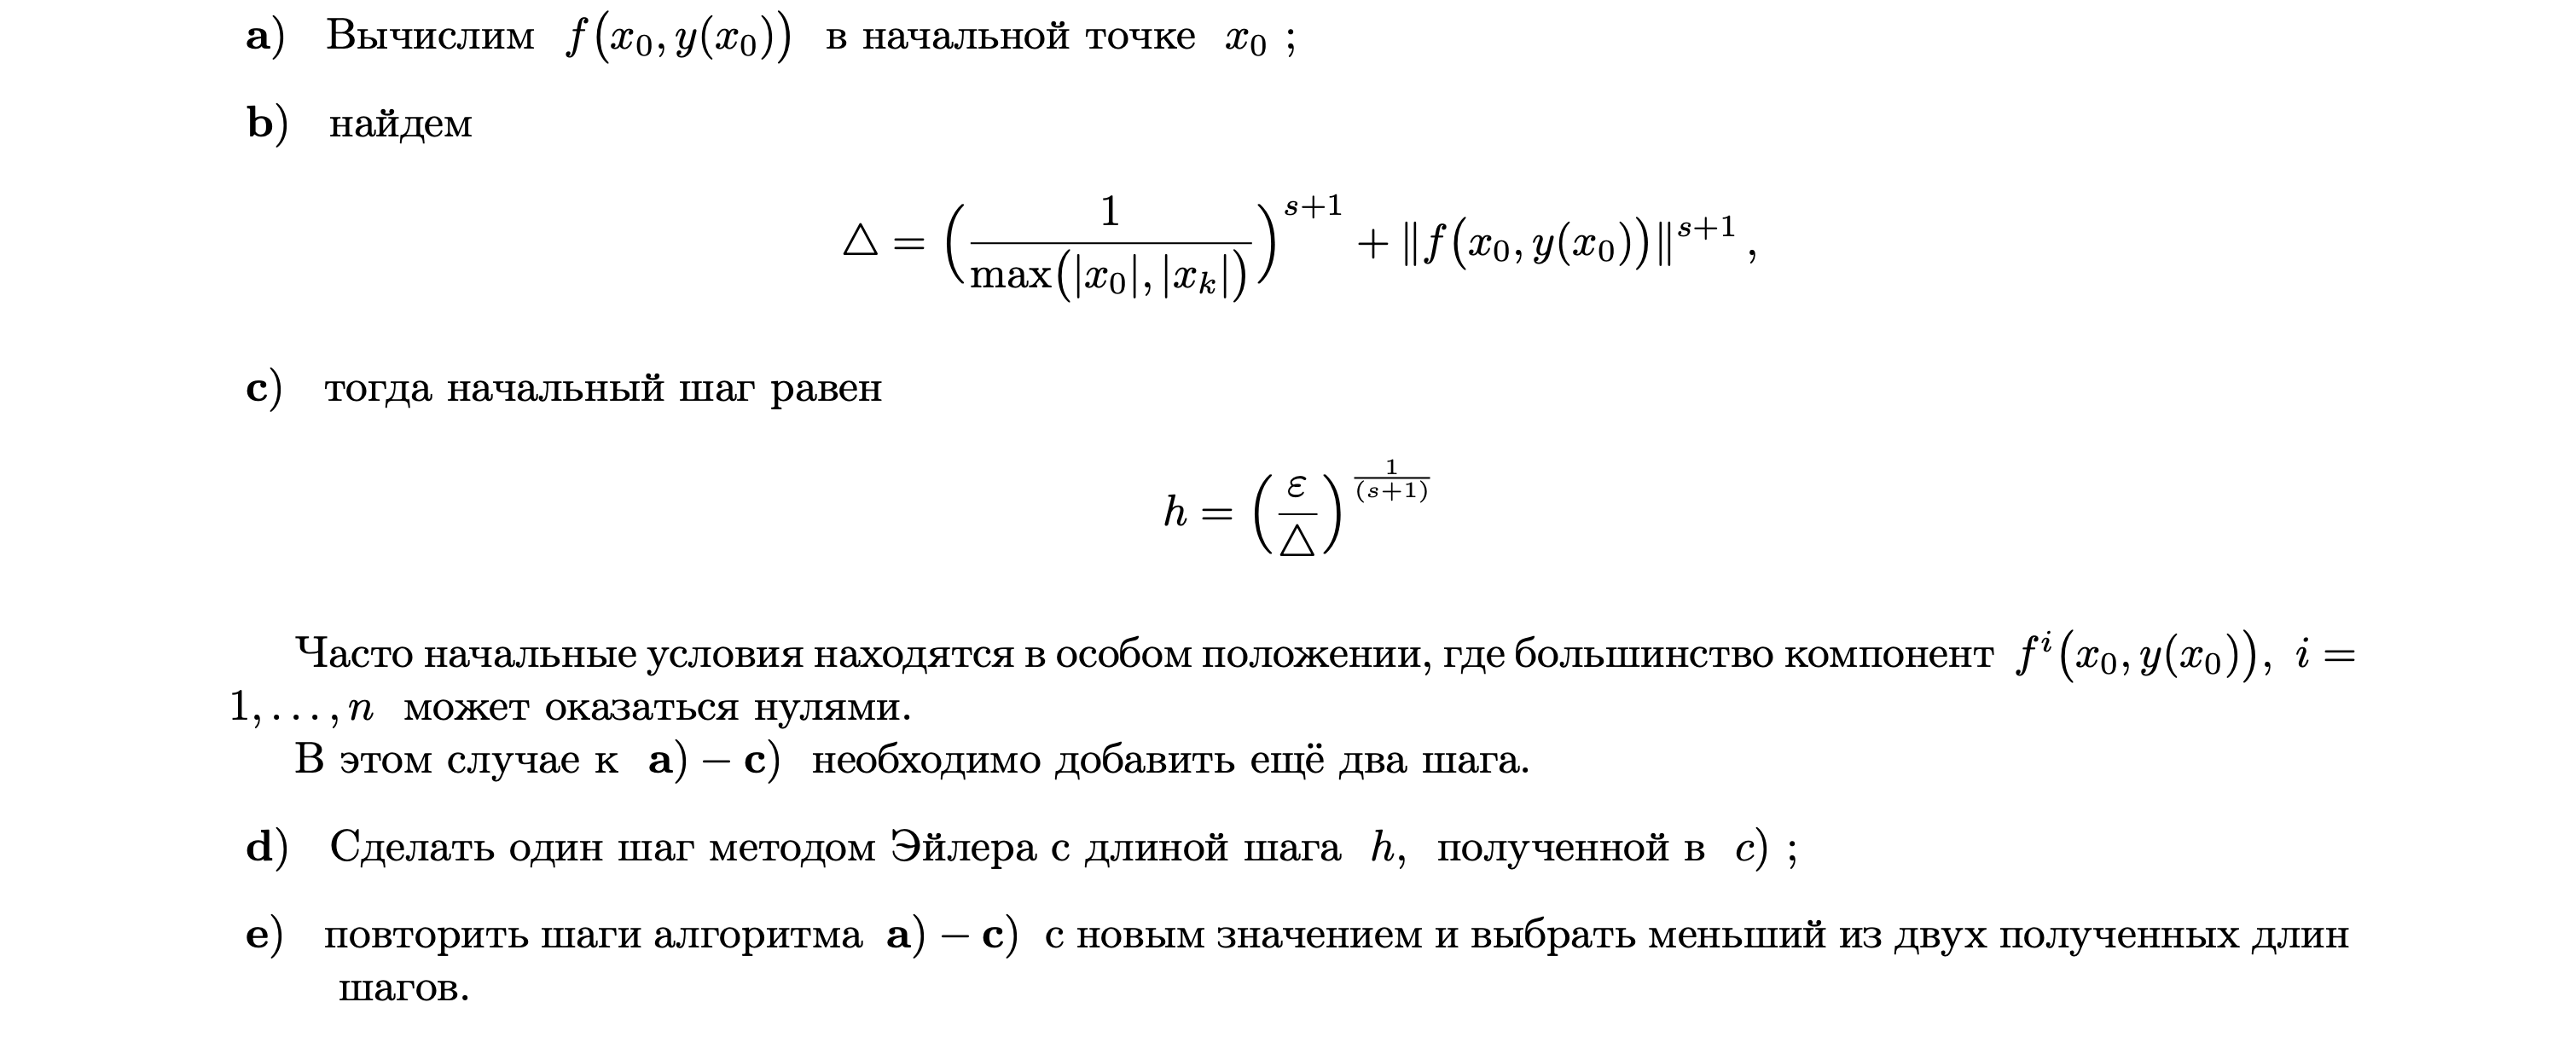

In [197]:
def first_step1(x0, x1, y0):
    """Выбор начального шага для ЯМРК 2"""
    
    s = 2 # так как метод 2 порядка
    # Пункт a)
    ff = func(x0, y0)
    count = 0
    
    for i in ff:
        if i == 0:
            count += 1
    
    # Пункт b)
    delta = (1/(max(abs(x0), abs(x1))))**(s+1) + abs(np.linalg.norm(ff))**(s+1)
    h1 = (rtol/delta)**(1/(s+1))
    
    # см. пункты d) - e)
    if count > 2:
        x0 = x0 + h1
        y0 = np.array(y0) + h1*np.array(ff)
        ff = func(x0, y0)
        delta = (1/(max(abs(x0), abs(x1))))**(s+1) + abs(np.linalg.norm(ff))**(s+1)
        h11 = (rtol/delta)**(1/(s+1))
        
        return min(h1, h11)

    else:
        return h1

In [198]:
def first_step2(x0, x1, y0):
    """Выбор начального шага для ЯМРК 4"""
    
    s = 4 # так как метод 4 порядка
    # Пункт a)
    ff = func(x0, y0)
    count = 0
    
    for i in ff:
        if i == 0:
            count += 1
    
    # Пункт b)
    delta = (1/(max(abs(x0), abs(x1))))**(s+1) + abs(np.linalg.norm(ff))**(s+1)
    h1 = (rtol/delta)**(1/(s+1))
    
    # см. пункты d) - e)
    if count > 2:
        x0 = x0 + h1
        y0 = np.array(y0) + h1*np.array(ff)
        ff = func(x0, y0)
        delta = (1/(max(abs(x0), abs(x1))))**(s+1) + abs(np.linalg.norm(ff))**(s+1)
        h11 = (rtol/delta)**(1/(s+1))
        
        return min(h1, h11)

    else:
        return h1

### Локальная погрешность Рунге

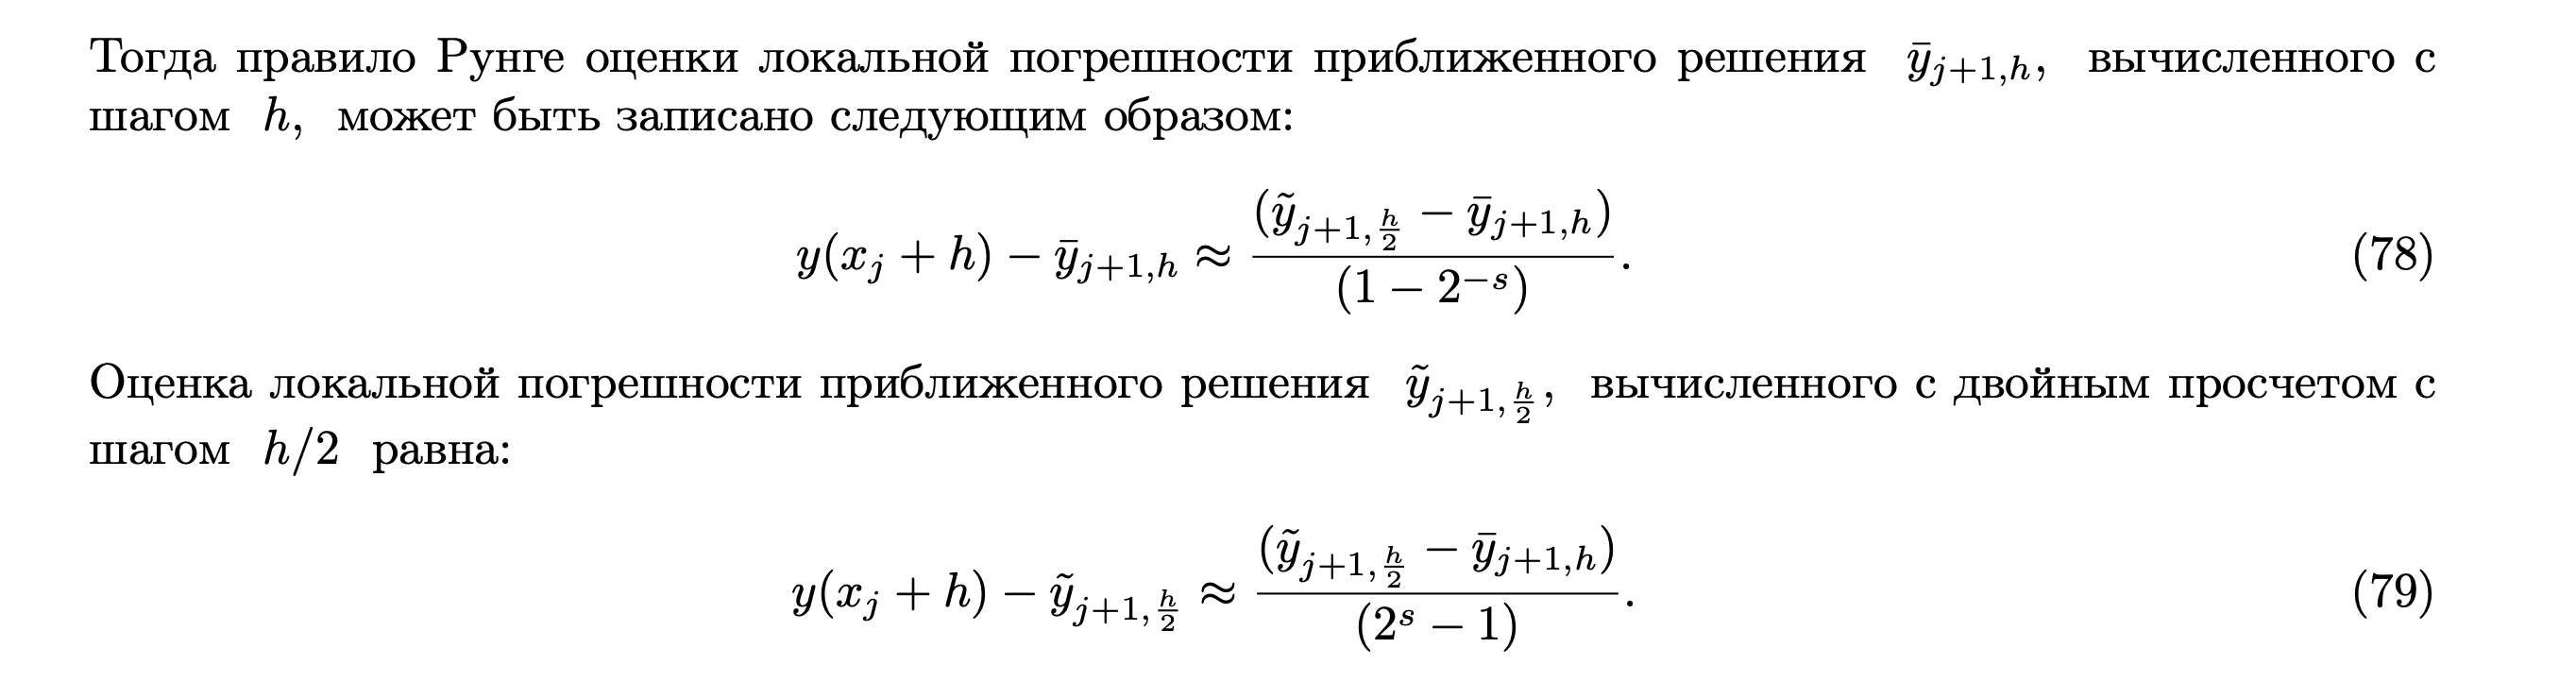

In [199]:
def local_errorrate(xk, yk, h):
    """Вычисление локальной погрешности для ЯМРК 2"""
    
    y_1step = rungekutta2(f=func, y0=yk, N=1, x0=xk, x1=xk+h)
    y_1step = y_1step[1]
    
    y_2step = rungekutta2(f=func, y0=yk, N=2, x0=xk, x1=xk+h)
    y_2step = y_2step[2]

    s = 2
    errorrate = (np.array(y_2step) - np.array(y_1step)) / (2**s - 1)
    
    return np.linalg.norm(errorrate)

In [200]:
def local_errorrate2(xk, yk, h):
    """Вычисление локальной погрешности для ЯМРК 4 (оппонент)"""
    
    y_1step = opponent(f=func, y0=yk, N=1, x0=xk, x1=xk+h)
    y_1step = y_1step[1]
    
    y_2step = opponent(f=func, y0=yk, N=2, x0=xk, x1=xk+h)
    y_2step = y_2step[2]
    
    s = 4
    errorrate = (np.array(y_2step) - np.array(y_1step)) / (2**s - 1)
    
    return np.linalg.norm(errorrate)

### Полная погрешность

In [201]:
def full_errorrate_rungekutta2(x0, x1, y0, h):
    """Вычисление полной погрешности для ЯМРК 2
    
    x0: начальное положение
    x1: конечное положение
    y0: начальные данные
    h: шаг
    """
    
    N1 = int((x1-x0) / h)
    N2 = 2*N1
    
    res1_1 = rungekutta2(func, y0, N1, x0, x1)
    res1_1 = res1_1[N1]
    
    res1_2 = rungekutta2(func, y0, N2, x0, x1)
    res1_2 = res1_2[N2]
    
    R = np.array(res1_1) - np.array(res1_2)
    
    return np.linalg.norm(R)

In [202]:
def full_errorrate_opponent(x0, x1, y0, h):
    """Вычисление полной погрешности для метода-оппонента
    
    x0: начальное положение
    x1: конечное положение
    y0: начальные данные
    h: шаг
    """
    
    N1 = int((x1-x0) / h)
    N2 = 2*N1
    
    res1_1 = opponent(func, y0, N1, x0, x1)
    res1_1 = res1_1[N1]
    
    res1_2 = opponent(func, y0, N2, x0, x1)
    res1_2 = res1_2[N2]
    
    R = np.array(res1_1) - np.array(res1_2)
    
    return np.linalg.norm(R)

### Автоматический выбор шага интегрирования для ЯМРК 2

In [216]:
def auto_step_rungekutta2(x0, x1, y0, h0, h_max, rtol):
    """
    Функция, реализующая автоматический выбор шага для ЯМРК 2
    
    x0: начальное положение
    x1: конечное положение
    y0: начальные данные
    h0: начальный шаг
    h_max максимально допустимый шаг
    rtol: требуемая точность
    """

    H = [] # массив шагов
    H.append(h0)

    # массивы значений X, Y, R для графиков
    X, R, Y1, Y2  = [], [], [], []
    precise_sols, precise_loc_err = [], []
    
    s = 2 # потому что метод 2 порядка

    x_temp = x0
    y_temp = y0
    h_temp = h0
    
    nodes = np.linspace(x_temp, x1, 10)
    sol = odeint(SODE, y0, nodes, args=(A, B))
    
    r = local_errorrate(x_temp, y_temp, h_temp)

    X.append(x_temp)
    Y1.append(y_temp[0])
    Y2.append(y_temp[1])
    
    precise_sols.append(sol)
    
    R.append(r)

    # полная погрешность
    R_ful = []
    R_ful.append(full_errorrate_rungekutta2(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))

    # счетчик обращений к правой части
    count = 2
    
    """Истинная локальная погрешность, которая считается как разность между двумя точными решениями:
            тем, который получен на текущем шаге и проходит через точку x_{i}, и тем, что получен на предыдущем и
            проходящем через точку x_{i-1} (см. картинку ниже). На первом шаге: 0"""
    precise_loc_err.append(0)
    
    while x_temp <= x1:
        """Здесь реализуется один из четырех возможных 
        вариантов принятия решения"""
        if r > rtol*(2**s):
            """Если оценка локальной погрешности превосходит некоторую наперед заданную границу,
            то считается, что приближенное решение с шагом h_i не удовлетворяет заданной точности.
            Уменьшаем шаг вдвое и пересчитываем заново"""
            
            # x_temp не меняется, остаемся на том же шаге
            h_temp = h_temp / 2
            H[-1] = h_temp
            # высчитываем новый r
            
            y_1step = rungekutta2(f=func, y0=y_temp, N=1, x0=x_temp, x1=x_temp + h_temp/2)
            y_1step = y_1step[1]
            
            y_2step = rungekutta2(f=func, y0=y_temp, N=2, x0=x_temp, x1=x_temp + h_temp)
            y_2step = y_2step[2]
            
            r = np.linalg.norm(np.array(y_2step) - np.array(y_1step))
            R[-1] = r # меняем значение r            
            R_ful[-1] = full_errorrate_rungekutta2(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp)
            
            """Истинная локальная погрешность, которая считается как разность между двумя точными решениями:
            тем, который получен на текущем шаге и проходит через точку x_{i}, и тем, что получен на предыдущем и
            проходящем через точку x_{i-1} (см. картинку ниже)"""
            nodes = np.linspace(x_temp, x1, 10)
            sol = odeint(SODE, y0, nodes, args=(A, B))
            precise_sols.append(sol)
            precise_loc_err.append(np.linalg.norm(abs(np.array(precise_sols[-1]) - np.array(precise_sols[-2]))))
    
            count += 8

        elif rtol < r <= tol*(2**s):
            """Оценка локальной погрешности приближенного решения с шагом h_i удовлетворяет
            предписанной точности. Увеличивание шага интегрирования в два раза 
            выведет погрешность за рамки допустимого. Шаг остается неизменным"""
            
            y_temp = rungekutta2(f=func, y0=y_temp, N=2, x0=x_temp, x1=x_temp + h_temp)
            y_temp = y_temp[1]             
            x_temp += h_temp
            
            h_temp = h_temp / 2
            H.append(h_temp)
            
            r = local_errorrate(x_temp, y_temp, h_temp)
            
            X.append(x_temp)            
            Y1.append(y_temp[0])
            Y2.append(y_temp[1])            
            R.append(r)
            R_ful.append(full_errorrate_rungekutta2(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))
            
            """Истинная локальная погрешность, которая считается как разность между двумя точными решениями:
            тем, который получен на текущем шаге и проходит через точку x_{i}, и тем, что получен на предыдущем и
            проходящем через точку x_{i-1} (см. картинку ниже)"""
            nodes = np.linspace(x_temp, x1, 10)
            sol = odeint(SODE, y0, nodes, args=(A, B))
            precise_sols.append(sol)
            precise_loc_err.append(np.linalg.norm(abs(np.array(precise_sols[-1]) - np.array(precise_sols[-2]))))
            
            count += 6

        elif 1/(2**(s+1))*rtol <= r <= tol:
            """Оценка локальной погрешности приближенного решения с шагом h_i не удовлетворяет
            предписанной точности, но можно взять приближение с шагом 0.5 * h_i"""  
                
            y_temp = rungekutta2(f=func, y0=y_temp, N=1, x0=x_temp, x1=x_temp + h_temp)
            y_temp = y_temp[1]        
            x_temp += h_temp
        
            # h_temp без изменений
            H.append(h_temp)
            
            r = local_errorrate(x_temp, y_temp, h_temp)
            X.append(x_temp)
            Y1.append(y_temp[0])
            Y2.append(y_temp[1])
            R.append(r)
            R_ful.append(full_errorrate_rungekutta2(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))
            
            """Истинная локальная погрешность, которая считается как разность между двумя точными решениями:
            тем, который получен на текущем шаге и проходит через точку x_{i}, и тем, что получен на предыдущем и
            проходящем через точку x_{i-1} (см. картинку ниже)"""
            nodes = np.linspace(x_temp, x1, 10)
            sol = odeint(SODE, y0, nodes, args=(A, B))
            precise_sols.append(sol)
            precise_loc_err.append(np.linalg.norm(abs(np.array(precise_sols[-1]) - np.array(precise_sols[-2]))))
            
            count += 6

        elif r < 1/(2**(s+1))*tol:
            """Оценка лок. пог. значительно меньше заданной. Рекомендуется увеличить
            шаг интегирования вдвое (это нужно для того, чтобы не совершать триллион шагов,
            когда задачу можно решить за существенно меньшее число итераций)"""
            
            y_temp = rungekutta2(f=func, y0=y_temp, N=1, x0=x_temp, x1=x_temp + h_temp)
            y_temp = y_temp[1]                        
            x_temp += h_temp
                
            h_temp = min(2*h_temp, h_max)
            H.append(h_temp)
            
            r = local_errorrate(x_temp, y_temp, h_temp)
            X.append(x_temp)
            Y1.append(y_temp[0])
            Y2.append(y_temp[1])            
            R.append(r)
            R_ful.append(full_errorrate_rungekutta2(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))
            
            """Истинная локальная погрешность, которая считается как разность между двумя точными решениями:
            тем, который получен на текущем шаге и проходит через точку x_{i}, и тем, что получен на предыдущем и
            проходящем через точку x_{i-1} (см. картинку ниже)"""
            nodes = np.linspace(x_temp, x1, 10)
            sol = odeint(SODE, y0, nodes, args=(A, B))
            precise_sols.append(sol)
            precise_loc_err.append(np.linalg.norm(abs(np.array(precise_sols[-1]) - np.array(precise_sols[-2]))))
            
            count += 6
            
    """Блок кода, отвечающий за то, чтобы на последнем шаге произвести вычисления именно в точке x1,
    а не в более дальней (алгоритм выше написан так, что последняя точка оказыватся больше, чем x1 = pi,
    поэтому необходимы корректировки)"""
    
    h_err = x1 - X[-2]
    y_temp = rungekutta2(f=func, y0=y_temp, N=1, x0=X[-2], x1=X[-2] + h_err)
    y_temp = y_temp[1]
    H[-1] = h_err
    r = local_errorrate(X[-2], y_temp, h_err)
    X[-1] = X[-2] + h_err
    Y1[-1] = y_temp[0]
    Y2[-1] = y_temp[1]            
    R[-1] = r
    R_ful[-1] = full_errorrate_rungekutta2(X[-2], min(x1, X[-2] + h_err), y_temp, h_err)
    
    count += 6
            
    return {'Y1': Y1, 
            'Y2': Y2, 
            'R': R, 
            'H': H, 
            'X': X, 
            'y_temp': y_temp, 
            'R_ful': R_ful, 
            'count': count,
            'prec_loc': precise_loc_err}

### Автоматический выбор шага интегрирования для метода-оппонента (ЯМРК 4)

In [217]:
def auto_step_opponent(x0, x1, y0, h0, h_max, rtol):
    """Функция автоматического выбора шага для метода-оппонента
    
    x0: начальное положение
    x1: конечное положение
    y0: начальные данные
    h0: начальный шаг
    h_max максимально допустимый шаг
    rtol: требуемая точность
    """
        
    H = [] # массив шагов
    H.append(h0)
    s = 4 # потому что метод 4 порядка
    X, Y1, Y2, R = [], [], [], [] # массивы значений X, Y, R для графиков
    precise_sols2, precise_loc_err2 = [], []
    
    x_temp = x0
    y_temp = y0
    h_temp = h0
    r = local_errorrate(x_temp, y_temp, h_temp)

    X.append(x_temp)
    Y1.append(y_temp[0])
    Y2.append(y_temp[1])

    nodes = np.linspace(x_temp, x1, 10)
    sol = odeint(SODE, y0, nodes, args=(A, B))
    precise_sols2.append(sol)
    
    R.append(r)

    # точная полная погрешность
    R_ful = []
    R_ful.append(full_errorrate_opponent(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))

    # счетчик обращений к правой части
    count = 2
    
    """Истинная локальная погрешность, которая считается как разность между двумя точными решениями:
            тем, который получен на текущем шаге и проходит через точку x_{i}, и тем, что получен на предыдущем и
            проходящем через точку x_{i-1} (см. картинку ниже). На первом шаге: 0"""
    precise_loc_err2.append(0)

    while x_temp <= x1:
        if r > rtol*2**s:
            """Если оценка локальной погрешности превосходит некоторую наперед заданную границу,
            то считается, что приближенное решение с шагом h_i не удовлетворяет заданной точности.
            Уменьшаем шаг вдвое и пересчитываем заново"""
            
            # x_temp не меняется, остаемся на том же шаге
            h_temp = h_temp / 2
            H[-1] = h_temp
            # высчитываем новый r
            
            y_1step = opponent(f=func, y0=y_temp, N=1, x0=x_temp, x1=x_temp + h_temp/2)
            y_1step = y_1step[1]
            
            y_2step = opponent(f=func, y0=y_temp, N=2, x0=x_temp, x1=x_temp + h_temp/2)
            y_2step = y_2step[2]
            
            r = np.linalg.norm(np.array(y_2step) - np.array(y_1step))
            R[-1] = r
            R_ful[-1] = full_errorrate_opponent(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp)
            
            """Истинная локальная погрешность, которая считается как разность между двумя точными решениями:
            тем, который получен на текущем шаге и проходит через точку x_{i}, и тем, что получен на предыдущем и
            проходящем через точку x_{i-1} (см. картинку ниже)"""
            nodes = np.linspace(x_temp, x1, 10)
            sol = odeint(SODE, y0, nodes, args=(A, B))
            precise_sols2.append(sol)
            precise_loc_err2.append(np.linalg.norm(abs(np.array(precise_sols2[-1]) - np.array(precise_sols2[-2]))))
            
            count += 8
            
        elif rtol < r <= tol*2**s:
            """Оценка локальной погрешности приближенного решения с шагом h_i удовлетворяет
            предписанной точности. Увеличивание шага интегрирования в два раза 
            выведет погрешность за рамки допустимого. Шаг остается неизменным"""
            
            y_temp = opponent(f=func, y0=y_temp, N=2, x0=x_temp, x1=x_temp + h_temp)
            y_temp = y_temp[1]
            x_temp += h_temp
    
            h_temp = h_temp / 2
            
            H.append(h_temp)
            r = local_errorrate2(x_temp, y_temp, h_temp)
            
            X.append(x_temp)
            Y1.append(y_temp[0])
            Y2.append(y_temp[1])
            R.append(r)
            R_ful.append(full_errorrate_opponent(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))
            
            """Истинная локальная погрешность, которая считается как разность между двумя точными решениями:
            тем, который получен на текущем шаге и проходит через точку x_{i}, и тем, что получен на предыдущем и
            проходящем через точку x_{i-1} (см. картинку ниже)"""
            nodes = np.linspace(x_temp, x1, 10)
            sol = odeint(SODE, y0, nodes, args=(A, B))
            precise_sols2.append(sol)
            precise_loc_err2.append(np.linalg.norm(abs(np.array(precise_sols2[-1]) - np.array(precise_sols2[-2]))))
            
            count +=6
            
        elif 1/(2**(s+1))*rtol <= r <= tol:
            """Оценка локальной погрешности приближенного решения с шагом h_i не удовлетворяет
            предписанной точности, но можно взять приближение с шагом 0.5 * h_i"""
            
            y_temp = opponent(f=func, y0=y_temp, N=1, x0=x_temp, x1=x_temp + h_temp)
            y_temp = y_temp[1]
            x_temp += h_temp
                
            # h_temp без изменений
            H.append(h_temp)
            
            r = local_errorrate2(x_temp, y_temp, h_temp)
            X.append(x_temp)
            Y1.append(y_temp[0])
            Y2.append(y_temp[1])           
            R.append(r)
            R_ful.append(full_errorrate_opponent(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))
            
            """Истинная локальная погрешность, которая считается как разность между двумя точными решениями:
            тем, который получен на текущем шаге и проходит через точку x_{i}, и тем, что получен на предыдущем и
            проходящем через точку x_{i-1} (см. картинку ниже)"""
            nodes = np.linspace(x_temp, x1, 10)
            sol = odeint(SODE, y0, nodes, args=(A, B))
            precise_sols2.append(sol)
            precise_loc_err2.append(np.linalg.norm(abs(np.array(precise_sols2[-1]) - np.array(precise_sols2[-2]))))
            
            count += 6
            
        elif r < 1/(2**(s+1))*tol:
            """Оценка лок. пог. значительно меньше заданной. Рекомендуется увеличить
            шаг интегирования вдвое (это нужно для того, чтобы не совершать триллион шагов,
            когда задачу можно решить за существенно меньшее число итераций)"""
            
            y_temp = opponent(f=func, y0=y_temp, N=1, x0=x_temp, x1=x_temp + h_temp)
            y_temp = y_temp[1]
            x_temp += h_temp
                
            h_temp = min(2*h_temp, h_max)
            H.append(h_temp)
            
            r = local_errorrate2(x_temp, y_temp, h_temp)
            X.append(x_temp)
            Y1.append(y_temp[0])
            Y2.append(y_temp[1])            
            R.append(r)
            R_ful.append(full_errorrate_opponent(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))
            
            """Истинная локальная погрешность, которая считается как разность между двумя точными решениями:
            тем, который получен на текущем шаге и проходит через точку x_{i}, и тем, что получен на предыдущем и
            проходящем через точку x_{i-1} (см. картинку ниже)"""
            nodes = np.linspace(x_temp, x1, 10)
            sol = odeint(SODE, y0, nodes, args=(A, B))
            precise_sols2.append(sol)
            precise_loc_err2.append(np.linalg.norm(abs(np.array(precise_sols2[-1]) - np.array(precise_sols2[-2]))))
            
            count +=6
            
    """Блок кода, отвечающий за то, чтобы на последнем шаге произвести вычисления именно в точке x1,
    а не в более дальней (алгоритм выше написан так, что последняя точка оказыватся больше, чем x1 = pi,
    поэтому необходимы корректировки)"""
    
    h_err = x1 - X[-2]
    y_temp = opponent(f=func, y0=y_temp, N=1, x0=X[-2], x1=X[-2] + h_err)
    y_temp = y_temp[1]
    H[-1] = h_err
    r = local_errorrate2(X[-2], y_temp, h_err)
    X[-1] = X[-2] + h_err
    Y1[-1] = y_temp[0]
    Y2[-1] = y_temp[1]            
    R[-1] = r
    R_ful[-1] = full_errorrate_opponent(X[-2], min(x1, X[-2] + h_err), y_temp, h_err)
    
    count += 6
    

    return {'Y1': Y1, 
            'Y2': Y2, 
            'R': R, 
            'H': H, 
            'X': X, 
            'y_temp': y_temp, 
            'R_ful': R_ful, 
            'count': count,
            'prec_loc': precise_loc_err2}

In [218]:
h0_1 = first_step1(x0, x1, y0)
h0_2 = first_step2(x0, x1, y0)

res1 = auto_step_rungekutta2(x0, x1, y0, h0_1, h_max=1/16, rtol=10**(-14))
res2 = auto_step_opponent(x0, x1, y0, h0_2, h_max=1/16, rtol=10**(-14))

/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_65375/2198409037.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  h = (x1-x0) / N
/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_65375/330337662.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  h = (x1-x0) / N


### График локальной погрешности

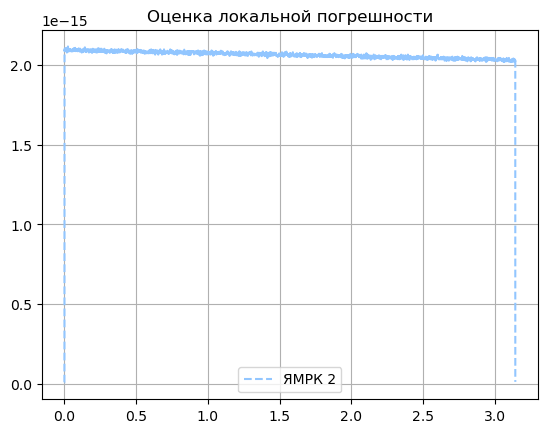

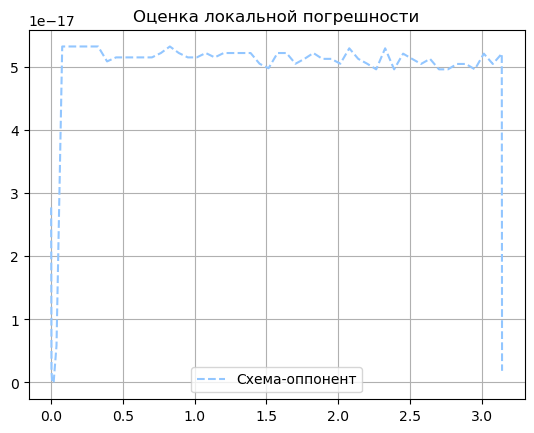

In [219]:
plt.plot(res1['X'], res1['R'], '--', label='ЯМРК 2')
plt.legend(loc='best')
plt.title('Оценка локальной погрешности')
plt.grid()
plt.show()

plt.plot(res2['X'], res2['R'], '--', label='Схема-оппонент')
plt.legend(loc='best')
plt.title('Оценка локальной погрешности')
plt.grid()
plt.show()

### Графики решений: ЯМРК 2, ЯМРК 4 и точное

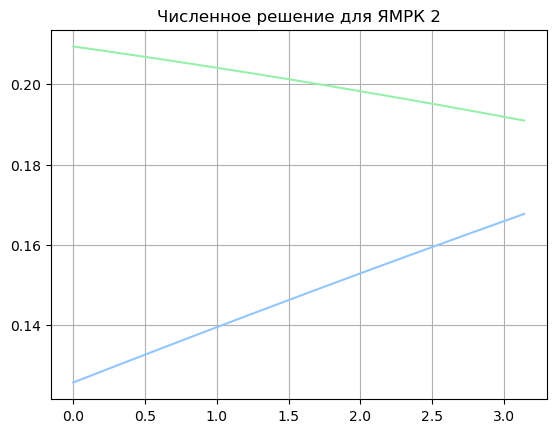

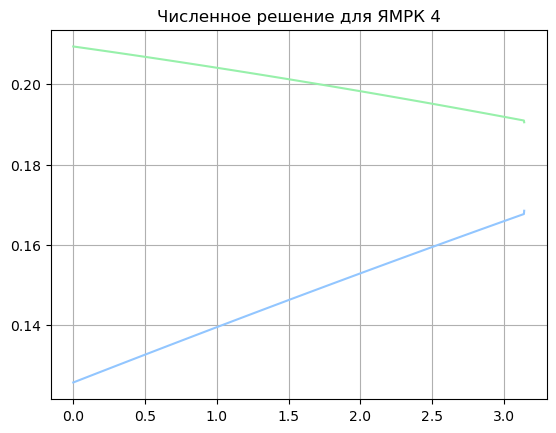

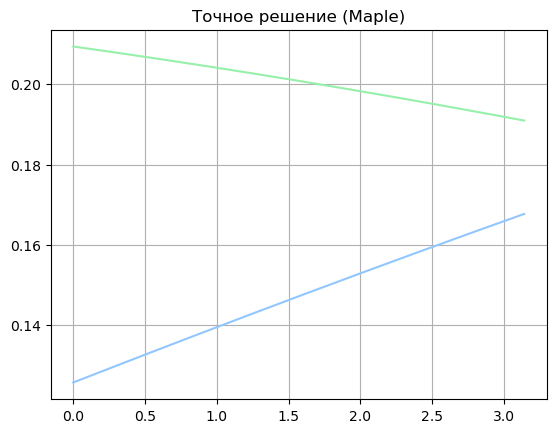

In [220]:
# plt.subplot(2, 2, 1)
plt.plot(res1['X'], res1['Y1'], )
plt.plot(res1['X'], res1['Y2'], )
plt.grid()
plt.title('Численное решение для ЯМРК 2')
plt.show()

# plt.subplot(2, 2, 2)
plt.plot(res2['X'], res2['Y1'], )
plt.plot(res2['X'], res2['Y2'], )
plt.title('Численное решение для ЯМРК 4')
plt.grid()
plt.show()

# plt.subplot(2, 2, 3)
nodes = np.linspace(x0, x1, 150)
plt.plot(nodes, y1(nodes))
plt.plot(nodes, y2(nodes))
plt.title('Точное решение (Maple)')
plt.grid()
plt.show()

### График зависимости длины шага от независимой переменной

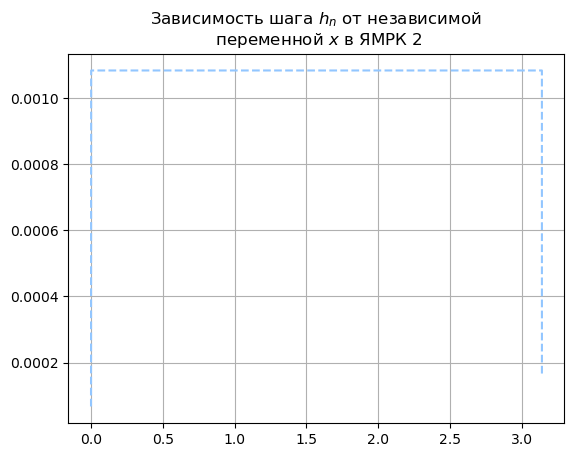

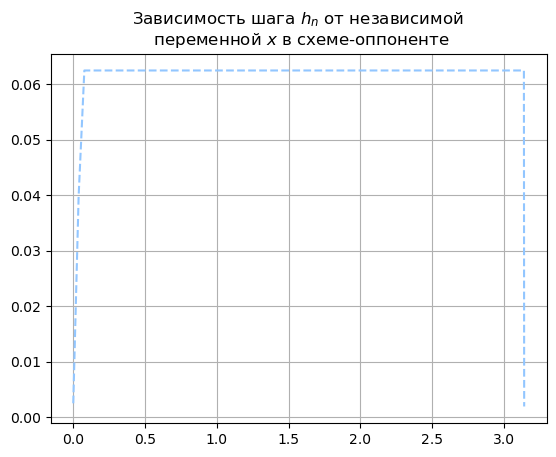

In [221]:
plt.plot(res1['X'], res1['H'], '--')
plt.title('Зависимость шага $h_n$ от независимой \n переменной $x$ в ЯМРК 2')
plt.grid()
plt.show()

plt.plot(res2['X'], res2['H'], '--')
plt.title('Зависимость шага $h_n$ от независимой \n переменной $x$ в схеме-оппоненте')
plt.grid()
plt.show()

### График зависимости оценки полной погрешности от независимой переменной

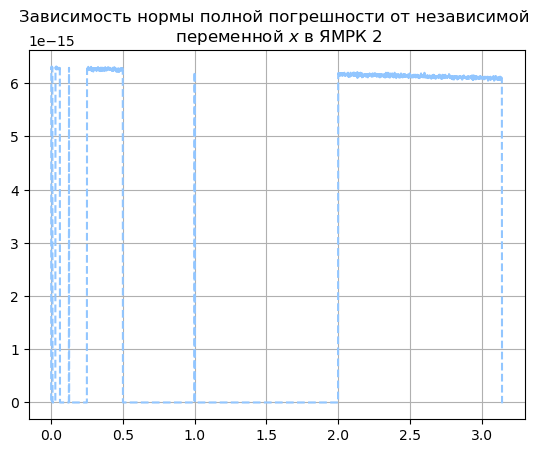

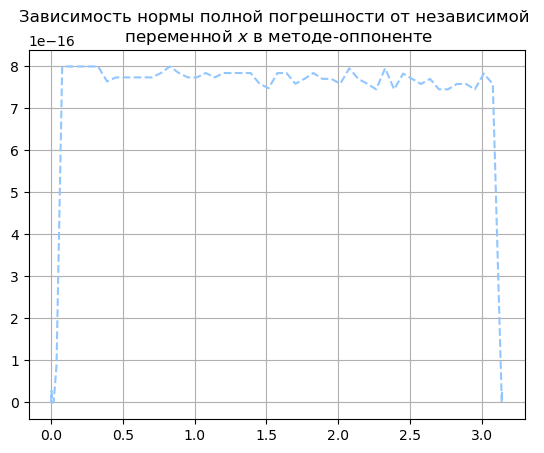

In [222]:
plt.plot(res1['X'], res1['R_ful'], '--')
plt.title('Зависимость нормы полной погрешности от независимой \n переменной $x$ в ЯМРК 2')
plt.grid()
plt.show()

plt.plot(res2['X'], res2['R_ful'], '--')
plt.title('Зависимость нормы полной погрешности от независимой \n переменной $x$ в методе-оппоненте')
plt.grid()
plt.show()

### Кол-во обращений к правой части в зависимости от rtol

In [223]:
Rtol = [10**(-11), 10**(-12), 10**(-13), 10**(-14)]
COUNT1 = []
COUNT2 = []

for rtol in Rtol:
    print(f'Считаем с rtol = {rtol}...')
    
    res1 = auto_step_rungekutta2(x0, x1, y0, h0_1, h_max=1/16, rtol=rtol)
    COUNT1.append(res1['count'])
    res2 = auto_step_opponent(x0, x1, y0, h0_2, h_max=1/16, rtol=rtol)
    COUNT2.append(res2['count'])

Считаем с rtol = 1e-11...
Считаем с rtol = 1e-12...


/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_65375/2198409037.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  h = (x1-x0) / N
/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_65375/330337662.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  h = (x1-x0) / N


Считаем с rtol = 1e-13...
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.3142305620056D+01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.3142305620056D+01   r2 =  0.3017159905456D+01
Считаем с rtol = 1e-14...


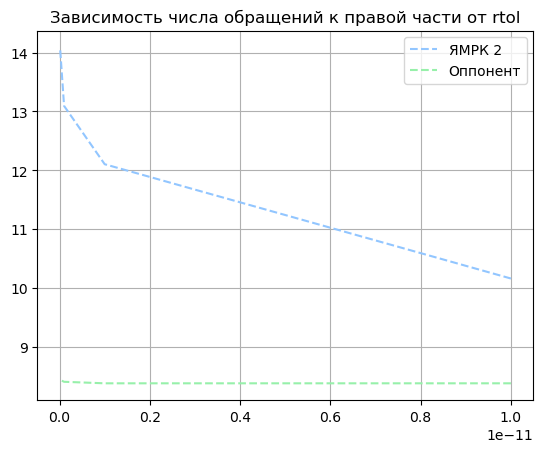

In [224]:
COUNT11 = []
COUNT22 = []

for i in range(len(Rtol)):
    COUNT11.append(np.log2(COUNT1[i]))
    COUNT22.append(np.log2(COUNT2[i]))
    
plt.plot(Rtol, COUNT11, '--', label='ЯМРК 2')
plt.plot(Rtol, COUNT22, '--', label='Оппонент')

plt.title('Зависимость числа обращений к правой части от rtol')
plt.grid()
plt.legend()
plt.show()

### Истинная локальная погрешность (включает построение интегральных кривых, проходящих через заданную точку $x_i$)

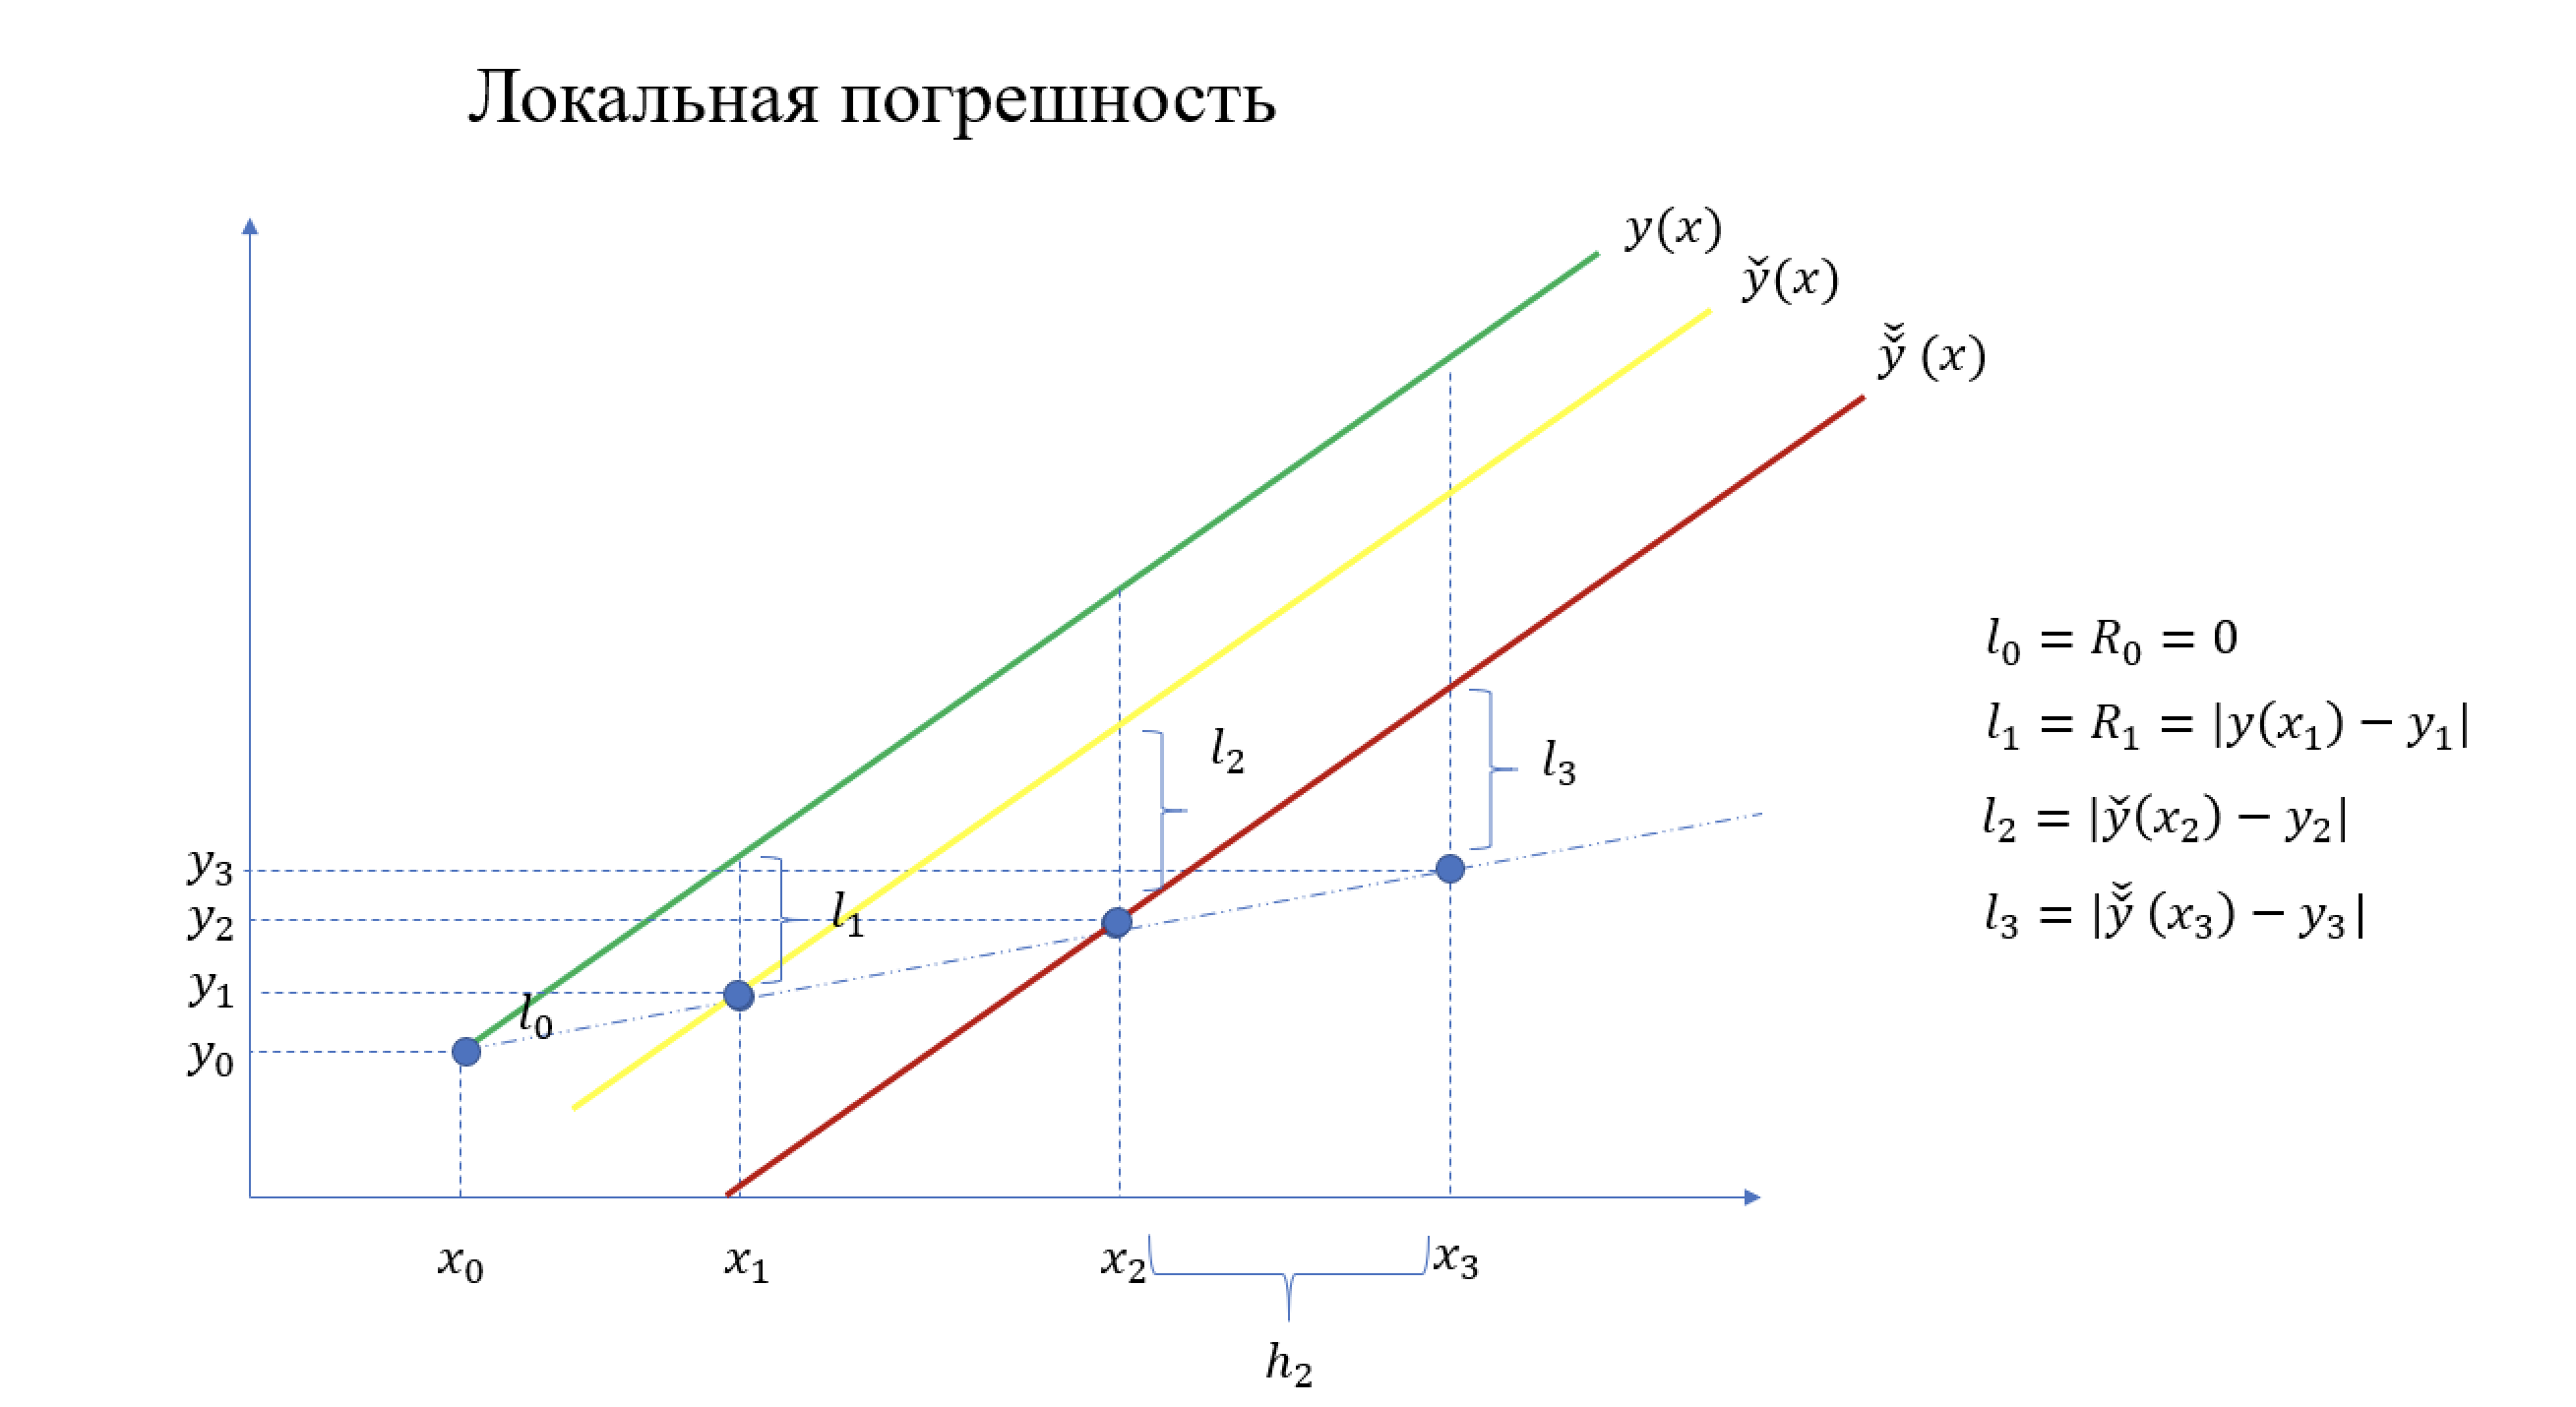

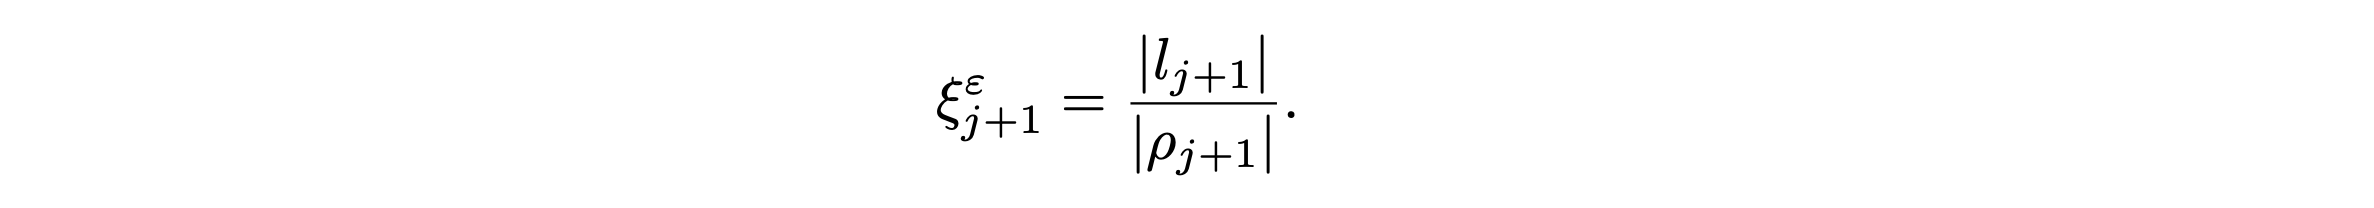

Здесь $l_{j+1}$ — истинная локальная погрешность ($l_i$ на рис. выше), $\rho_{j+1}$ — оценки локальной погрешности по формуле Рунге

In [225]:
temp3 = []
for i in range(min(len(res1['R']), len(res1['prec_loc']))):
    temp3.append((abs(np.array(res1['prec_loc'][i])) / abs(np.array(res1['R'][i]))))
    
temp4 = []
for k in range(min(len(res2['R']), len(res2['prec_loc']))):
    temp4.append((abs(np.array(res2['prec_loc'][k])) / abs(np.array(res2['R'][k]))))

/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_65375/3559794340.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  temp4.append((abs(np.array(res2['prec_loc'][k])) / abs(np.array(res2['R'][k]))))


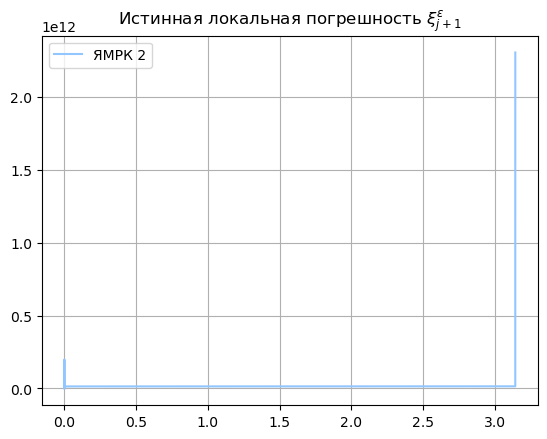

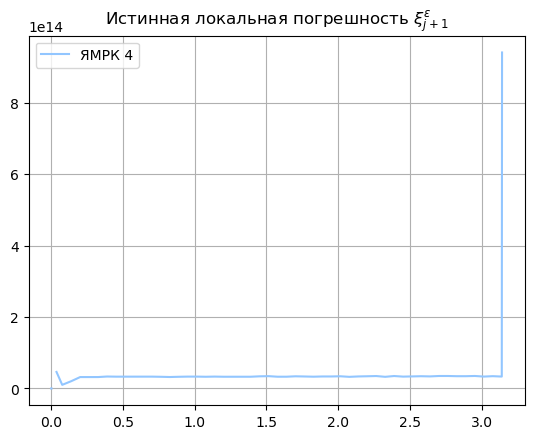

In [252]:
plt.plot(res1['X'], temp3, label='ЯМРК 2')
plt.grid()
plt.title(r'Истинная локальная погрешность $\xi^\varepsilon_{j+1}$')
plt.legend(loc='best')
plt.show()

plt.plot(res2['X'], temp4, label='ЯМРК 4')
plt.grid()
plt.title(r'Истинная локальная погрешность $\xi^\varepsilon_{j+1}$')
plt.legend(loc='best')
plt.show()

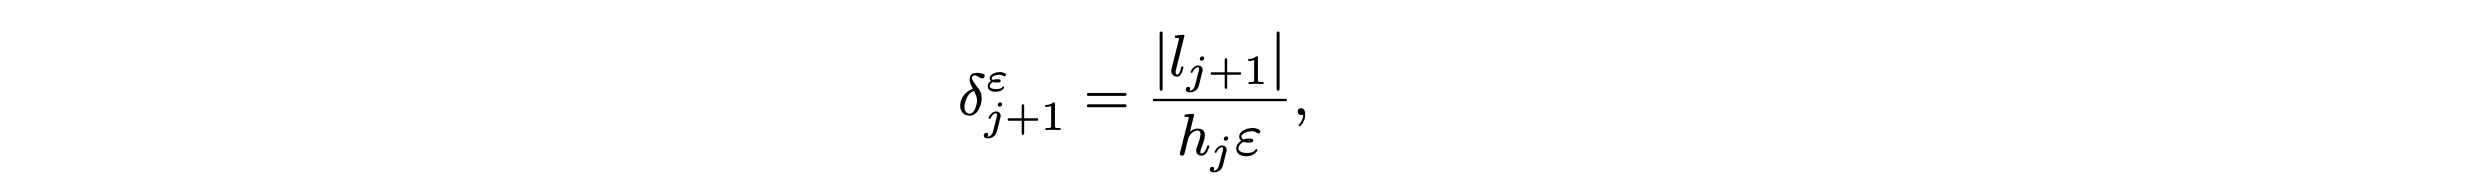

Здесь $l_{j+1}$ — истинная локальная погрешность ($l_i$ на рис. выше), $h_{j\varepsilon}$ — шаги

In [227]:
temp33 = []
for i in range(min(len(res1['R']), len(res1['prec_loc']))):
    temp33.append((abs(np.array(res1['prec_loc'][i])) / abs(np.array(res1['H'][i]))))
    
temp44 = []
for k in range(min(len(res2['R']), len(res2['prec_loc']))):
    temp44.append((abs(np.array(res2['prec_loc'][k])) / abs(np.array(res2['H'][k]))))

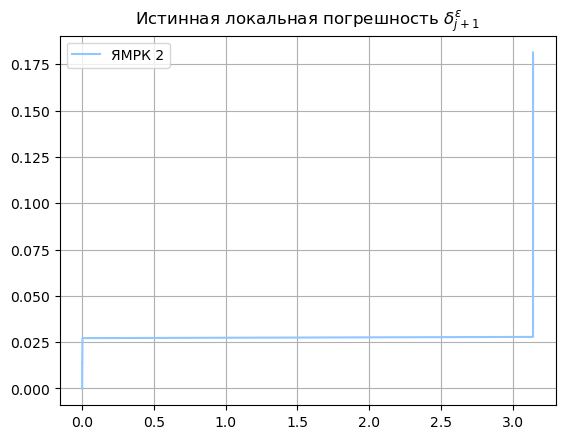

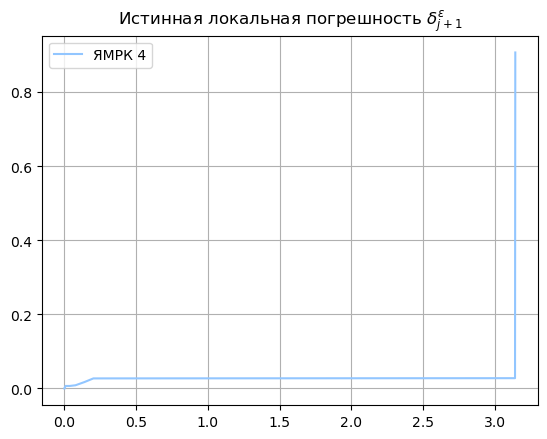

In [253]:
plt.plot(res1['X'], temp33, label='ЯМРК 2')
plt.grid()
plt.title(r'Истинная локальная погрешность $\delta^\varepsilon_{j+1}$')
plt.legend(loc='best')
plt.show()

plt.plot(res2['X'], temp44, label='ЯМРК 4')
plt.grid()
plt.title(r'Истинная локальная погрешность $\delta^\varepsilon_{j+1}$')
plt.legend(loc='best')
plt.show()

Вообще, на этих графиках получился бред, потому что в идеале тут должна быть асимптотика к 1 (это означает, что отношение истинной локальной погрешности к ее оценке стремится к 1, то есть численный алгоритм оч круто решает задачу, почти без потерь). Пока хз, как исправить — видимо, проблема в подсчете интегральных кривых, проходящих через заданную точку $x_{i-1}, x_i, \dots$